# Repositorio GitHub

https://github.com/Joaco15045F/InteligenciaArtificial/blob/main/Laboratorios/Laboratorio1/Lab1.ipynb

Dataset sobre diabetes

link:  https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [1]:
# Montar Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

#Solo funciona en google colab, por ello lo comento.

In [3]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = np.genfromtxt('/content/drive/MyDrive/datasets/diabetes.csv', delimiter=',', skip_header=1)
X, y = data[:, 7], data[:, 1]

m = y.size  # m = numero de ejemplos de entrenamiento

In [4]:
print(X)

[50. 31. 32. 21. 33. 30. 26. 29. 53. 54. 30. 34. 57. 59. 51. 32. 31. 31.
 33. 32. 27. 50. 41. 29. 51. 41. 43. 22. 57. 38. 60. 28. 22. 28. 45. 33.
 35. 46. 27. 56. 26. 37. 48. 54. 40. 25. 29. 22. 31. 24. 22. 26. 30. 58.
 42. 21. 41. 31. 44. 22. 21. 39. 36. 24. 42. 32. 38. 54. 25. 27. 28. 26.
 42. 23. 22. 22. 41. 27. 26. 24. 22. 22. 36. 22. 37. 27. 45. 26. 43. 24.
 21. 34. 42. 60. 21. 40. 24. 22. 23. 31. 33. 22. 21. 24. 27. 21. 27. 37.
 25. 24. 24. 46. 23. 25. 39. 61. 38. 25. 22. 21. 25. 24. 23. 69. 23. 26.
 30. 23. 40. 62. 33. 33. 30. 39. 26. 31. 21. 22. 29. 28. 55. 38. 22. 42.
 23. 21. 41. 34. 65. 22. 24. 37. 42. 23. 43. 36. 21. 23. 22. 47. 36. 45.
 27. 21. 32. 41. 22. 34. 29. 29. 36. 29. 25. 23. 33. 36. 42. 26. 47. 37.
 32. 23. 21. 27. 40. 41. 60. 33. 31. 25. 21. 40. 36. 40. 42. 29. 21. 23.
 26. 29. 21. 28. 32. 27. 55. 27. 57. 52. 21. 41. 25. 24. 60. 24. 36. 38.
 25. 32. 32. 41. 21. 66. 37. 61. 26. 22. 26. 24. 31. 24. 22. 46. 22. 29.
 23. 26. 51. 23. 32. 27. 21. 22. 22. 33. 29. 49. 41

In [5]:
print(y)

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.   0.  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148. 120.
 110. 111. 102. 134.  87.  79.  75. 179.  85. 129. 143. 130.  87. 119.
   0.  73. 141. 194. 181. 128. 109. 139. 111. 123. 159. 135.  85. 158.
 105. 

In [6]:
print(X.size)

768


In [7]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Glucosa')
    pyplot.xlabel('Edad')

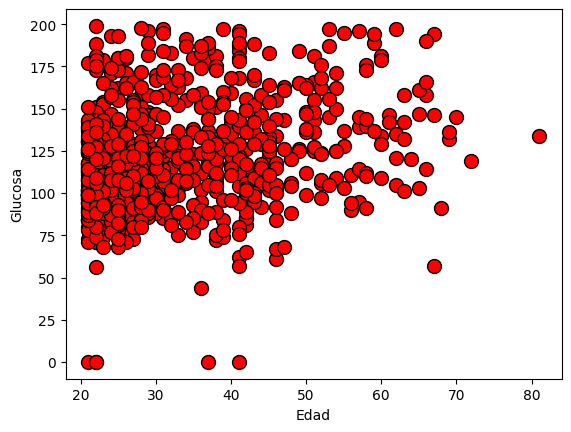

In [8]:
plotData(X, y)

In [9]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [10]:
# Función para calcular el costo de la regresión lineal
def computeCost(X, y, theta):
    m = y.size  # Número de ejemplos de entrenamiento
    h = np.dot(X, theta)  # Calcular la hipótesis
    J = (1/(2 * m)) * np.sum(np.square(h - y))  # Función de costo
    return J

In [53]:
# Calcular el costo inicial con theta = [0, 0]
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 15319.59\n')

Con theta = [0, 0] 
 Costo calculado = 7818.20
Valor de costo esperado (aproximadamente) 15319.59



In [74]:
# Calcular el costo con theta de prueba
J = computeCost(X, y, theta=np.array([-133.4358, 8.3644]))
print('Con theta = [-133.4358, 8.3644]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  15319.59')

Con theta = [-133.4358, 8.3644]
 Costo calculado = 477.64
Valor de costo esperado (aproximadamente)  15319.59


In [55]:
# Función para realizar descenso por gradiente
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # Número de ejemplos de entrenamiento
    theta = theta.copy()  # Copia de theta para no modificar el original
    J_history = []  # Lista para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))  # Guardar el costo en cada iteración

    return theta, J_history

In [70]:
# Inicializa los parámetros de ajuste
theta = np.zeros(2)

# Configuraciones para el descenso por gradiente
iterations = 500
alpha = 0.01


# Ejecutar descenso por gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))


Theta encontrada por descenso gradiente: -133.4358, 8.3644


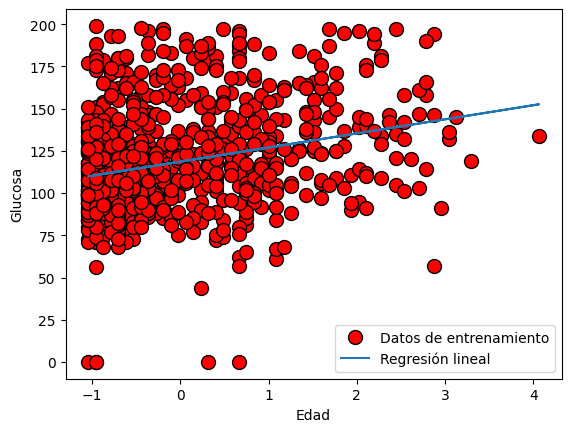

In [71]:
# Graficar la línea de regresión ajustada
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])

In [72]:
# Predicciones de glucosa para edades específicas
predict1 = np.dot([1, 3.5], theta)
print('Para una edad de 3.5 años, se predice un nivel de glucosa de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 9], theta)
print('Para una edad de 9 años, se predice un nivel de glucosa de {:.2f}\n'.format(predict2))

Para una edad de 3.5 años, se predice un nivel de glucosa de -104.16

Para una edad de 9 años, se predice un nivel de glucosa de -58.16



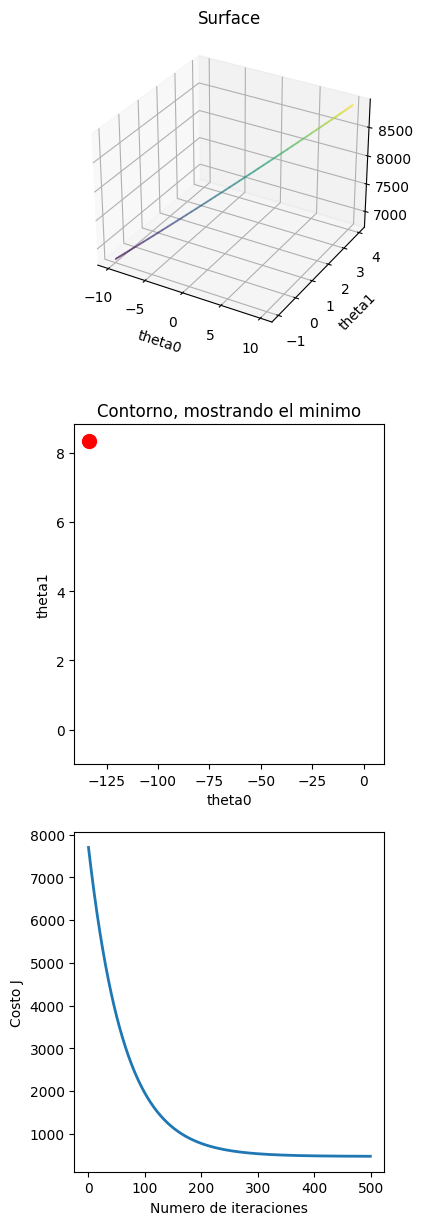

In [73]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass